# Bengaluru House Price Prediction

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data

In [2]:
df = pd.read_csv('Bengaluru_house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df1 = df.drop(["area_type","availability","society","balcony"], axis='columns')
df1.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [5]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
locations = df2.groupby('location')['location'].count().sort_values(ascending=False)

In [8]:
location_20 = locations[locations<=20]

In [9]:
df2['location'] = df2['location'].apply(lambda x: "others" if x in location_20 else x)
df2.groupby('location')['location'].count().sort_values(ascending=False)

<ipython-input-9-1709376d9ab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location'] = df2['location'].apply(lambda x: "others" if x in location_20 else x)


location
others                4314
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Thubarahalli            22
Sonnenahalli            22
Ulsoor                  21
Hoskote                 21
Basaveshwara Nagar      21
Name: location, Length: 144, dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-eadc3504d97e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,others,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def get_mean(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
df3 = df2.copy()
df3["total_sqft"] = df3["total_sqft"].apply(get_mean)
df3["total_sqft"].dtypes

dtype('float64')

In [16]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [17]:
df4 = df3.dropna()
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [18]:
df4.groupby("bath")["bath"].count().sort_values()

bath
40.0       1
18.0       1
15.0       1
14.0       1
27.0       1
16.0       2
13.0       3
11.0       3
12.0       7
10.0      13
9.0       41
8.0       64
7.0      102
6.0      269
5.0      521
1.0      781
4.0     1222
3.0     3274
2.0     6893
Name: bath, dtype: int64

Handling Outliers

In [19]:
df5 = df4[df4.bath <= 10]
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,others,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [20]:
df6 = df5.drop(["size"], axis="columns")
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,others,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [21]:
df7 = df6[(df6.total_sqft/df6.bhk>300)]
df7.shape

(12267, 5)

In [22]:
df7['price_per_sqft'] = df6['price']*100000/df6['total_sqft']
df7.head()

<ipython-input-22-f8926f473963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['price_per_sqft'] = df6['price']*100000/df6['total_sqft']


,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,others,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
df7["price_per_sqft"].describe()

count     12267.000000
mean       6208.337218
std        4033.686685
min         267.829813
25%        4200.000000
50%        5263.157895
75%        6825.291855
max      176470.588235
Name: price_per_sqft, dtype: float64

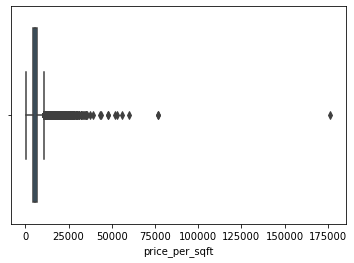

In [24]:
sns.boxplot(df7.price_per_sqft)

In [25]:
def remove_price_outlier(df):
    df_test = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)
        rdf = subdf[(subdf.price_per_sqft>=m-s)&(subdf.price_per_sqft<=m+s)]
        df_test = pd.concat([df_test,rdf], ignore_index=True)
    return df_test

In [26]:
df8 = remove_price_outlier(df7)

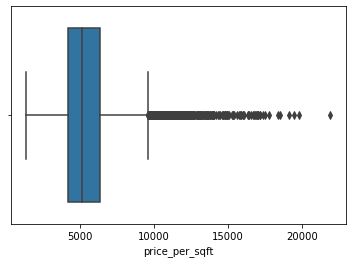

In [27]:
sns.boxplot(df8.price_per_sqft)

In [28]:
df8.shape

(10205, 6)

One-Hot Encoding

In [29]:
dummy = pd.get_dummies(df8["location"])
dummy

,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df9 =pd.concat([df8,dummy], axis="columns")
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1st Phase JP Nagar,2825.0,4.0,250.0,4,8849.557522,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2024.0,3.0,157.0,3,7756.916996,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,2059.0,3.0,225.0,3,10927.634774,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df10 = df9.drop(["location","price_per_sqft","others"], axis = "columns")
df10.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Ulsoor,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024.0,3.0,157.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X = df10.drop(["price"], axis="columns")

In [33]:
y = df10.price

Building Model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=LinearRegression(),X=X_train, y=y_train, cv=6)
model_score

array([0.7802154 , 0.79902392, 0.76121976, 0.76214171, 0.81489651,
       0.82418399])

In [36]:
model_score.mean()

0.7902802144472677

In [37]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)

0.8186243414506061

In [38]:
loc_index = np.where(X.columns=="2nd Stage Nagarbhavi")
loc_index

(array([4], dtype=int64),)

In [39]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [40]:
predict_price('2nd Stage Nagarbhavi',1000, 2, 2)

221.78738001949085

In [41]:
predict_price('Indira Nagar',1000, 2, 2)

178.60821985120506

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions)

1183.2666394386217

Exporting model to a pickle file

In [43]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)